### Jupyter

+ Language-independent part of IPython
+ Provides user interfaces (console, notebook)
  + browser is UI for notebook server
  + convenient cell editing (markdown / code) and evaluation
  + notebook provides checkpoint functions in addition to create/save/load
  + manage kernel (stop / restart / reconnect)
+ Provides document generators (nbconvert)
  + HTML, PDF, markdown, code-only, reStructuredText, LaTeX

### Maxima

+ Computer algebra == formal (ignoring content) manipulation of expressions
+ Maxima covers undergraduate math, more or less
+ Started in 1968 as part of Project MAC ("machine-aided cognition")
+ Written in Lisp, now open source, active community
+ Standard UI is ASCII-art console (useful, not pretty)
+ I'd like to use Jupyter as a UI to compose math + text documents

### Jupyter architecture

+ Client (front end) separated from kernel (back end)
+ Client and kernel talk through sockets provided by ZeroMQ


### Jupyter architecture diagram

![jupyter architecture diagram](http://jupyter-client.readthedocs.org/en/latest/_images/frontend-kernel.png "Jupyter architecture diagram")

### Messages

+ Evaluation:
  + Client reads user input, sends string to kernel, e.g.: `"diff(exp(a*x), x)"`
  + Kernel parses input, calls Maxima function to evaluate, returns result in two forms:
    + as the printed form of a Maxima expression
    + as LaTeX
  + Client chooses an appropriate form to display
+ Plot output:
  + Same as evaluation, but result is returned as SVG
+ Maxima-initiated questions (`asksign`):
  + Maxima wants to ask user about the sign of some expression
  + Kernel sends input prompt to client
  + Client prints prompt, reads user input, sends string to kernel
  + Kernel passes user input to Maxima
  + Maxima completes whatever it was working on before

### Examples

#### Formulate an expression

In [1]:
foo : 'diff (1/(1 + sqrt(1 - a*x^2)), x, 2);

 2
d            1
--- (------------------)
  2              2
dx   sqrt(1 - a x ) + 1


#### Evaluate

In [2]:
bar : ev (foo, nouns);

                                                       2  2
                 a                                    a  x
------------------------------------ + -----------------------------------
            2               2      2           2 3/2              2      2
sqrt(1 - a x ) (sqrt(1 - a x ) + 1)    (1 - a x )    (sqrt(1 - a x ) + 1)
                                                              2  2
                                                           2 a  x
                                             + --------------------------------
                                                       2               2      3
                                               (1 - a x ) (sqrt(1 - a x ) + 1)


#### asksign prompt

In [3]:
integrate (x^k, x);

Is k equal to - 1?
y


log(x)


In [4]:
integrate (x^k, x);

Is k equal to - 1?
n


 k + 1
x
------
k + 1


#### Plot output

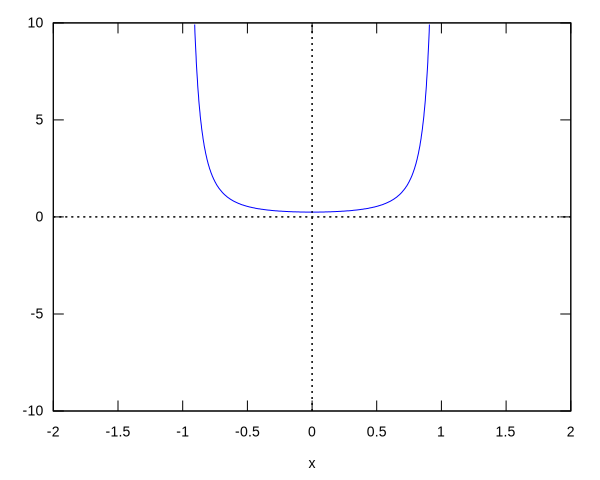

plot2d: expression evaluates to non-numeric value somewhere in plotting range.
plot2d: some values were clipped.


In [5]:
plot2d (subst (a = 1, bar), [x, -2, 2], [y, -10, 10], [svg_file, "maxplot.svg"]);

### Minor features

+ Code syntax highlighting
  + In browser via CodeMirror
  + In HTML output via Pygments
  + Maxima-specific stuff is encapsulated in a function which only does some regex matching

### Links

+ Jupyter
  + [Project home page](http://jupyter.org)
  + [List of kernels in other languages](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)
  + [Jupyter client/kernel interface spec](http://jupyter-client.readthedocs.org/en/latest/index.html)
+ Maxima
  + [Project home page](http://maxima.sourceforge.net)
+ Maxima-Jupyter
  + [Project home page](https://github.com/robert-dodier/maxima-jupyter)
  + [Example Maxima-Jupyter notebook](http://nbviewer.ipython.org/github/robert-dodier/maxima-jupyter/blob/master/MaximaJupyterExample.ipynb)
+ About the author
  + [Robert Dodier](http://linkedin.com/in/robertdodier)